In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions

%matplotlib inline

In [7]:
# load pre-trained Xception model

model = tf.keras.applications.xception.Xception(weights = 'imagenet', include_top=True)

# Summary of Xception Model
print(model.summary)

91889664/91884032 [==============================] - 4s 0us/step
<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7fca50b127c0>>


In [10]:
print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7fca50b127c0>>


#### Get labels for images

In [ ]:
import requests

#fetching labels from Imagenet
response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()
imgnet_map   # {'0': ['n01440764', 'tench'],   '1': ['n01443537', 'goldfish'], etc.

In [ ]:
imgnet_num_from_label = {v[1]:k for k, v in imgnet_map.items()}
imgnet_num_from_label 

In [ ]:
imgnet_label_from_num = {k:v[1] for k, v in imgnet_map.items()}
imgnet_label_from_num 

#### Get image

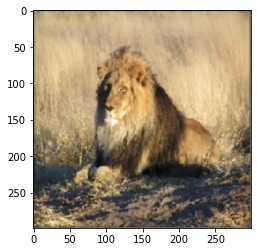

In [15]:
# load and pre-process image of a lion

IMAGE_PATH = 'data/lion.jpg'
img=tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(299, 299))
img=tf.keras.preprocessing.image.img_to_array(img)

# view the image
plt.imshow(img/255.)

In [31]:
# make model predictions

img = tf.keras.applications.xception.preprocess_input(img)

In [32]:
img.shape

(299, 299, 3)

In [34]:
predictions = model.predict(np.array([img]))

In [41]:
prediction_decoded = decode_predictions(predictions, top=5)
prediction_decoded

[[('n02129165', 'lion', 0.9466645),
  ('n02112137', 'chow', 0.0034712008),
  ('n02487347', 'macaque', 0.0009838413),
  ('n02130308', 'cheetah', 0.00070434203),
  ('n02129604', 'tiger', 0.00069191545)]]

In [38]:
prediction_decoded[0][0][1]

'lion'

In [39]:
predictions.shape

(1, 1000)